# ***DOWNLOADING THE DATASET***

In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving archive (6).zip to archive (6).zip


In [3]:
import zipfile

zip_path = "/content/archive (6).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/mnist_data")

print("✅ Dataset unzipped successfully!")


✅ Dataset unzipped successfully!


# ***Importing All  Required Libraries***

In [4]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# ***LOADING THE DATASET USING TORCH-VISION***

In [5]:

from torchvision import datasets, transforms

transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print("Training dataset size:", len(train_dataset))
print("Testing dataset size:", len(test_dataset))


100%|██████████| 9.91M/9.91M [00:00<00:00, 39.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.09MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.98MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.56MB/s]

Training dataset size: 60000
Testing dataset size: 10000


# ***Creating separate DataLoader for training***

In [6]:
from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

print("✅ DataLoaders created successfully!")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of testing batches: {len(test_loader)}")


✅ DataLoaders created successfully!
Number of training batches: 938
Number of testing batches: 157


# ***Printing Total Number of Samples***

In [7]:
print("Total training samples:", len(train_dataset))
print("Total test samples:", len(test_dataset))

Total training samples: 60000
Total test samples: 10000


# ***Retrieving a  batch of images and labels***

In [8]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

print("Images batch shape:", images.shape)
print("Labels batch shape:", labels.shape)

Images batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


# ***Printing the shape of one image tensor***

In [9]:
single_image = images[0]

print("Shape of one image tensor:", single_image.shape)  # Expected: [1, 28, 28]

print("Data type:", single_image.dtype)

print("Min value:", torch.min(single_image).item())
print("Max value:", torch.max(single_image).item())

Shape of one image tensor: torch.Size([1, 28, 28])
Data type: torch.float32
Min value: 0.0
Max value: 0.9960784316062927


# **Displaying a Random Batch**

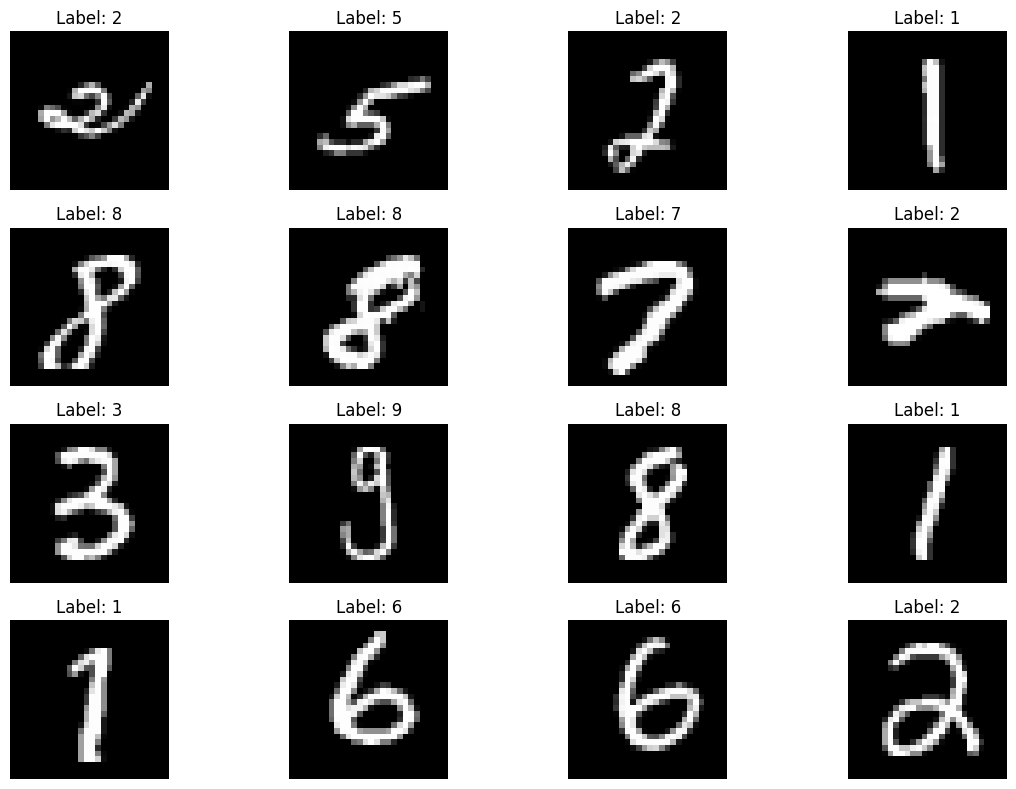

In [10]:
import matplotlib.pyplot as plt
import numpy as np

data_iter = iter(train_loader)
images, labels = next(data_iter)

images_np = images.numpy()

batch_size = images.shape[0]

plt.figure(figsize=(12, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(images_np[i].squeeze(), cmap='gray')
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# ***Verifying Pixel Value Normalization***

In [11]:
print("Minimum pixel value in batch:", torch.min(images).item())
print("Maximum pixel value in batch:", torch.max(images).item())
print("Mean pixel value in batch:", torch.mean(images).item())


Minimum pixel value in batch: 0.0
Maximum pixel value in batch: 1.0
Mean pixel value in batch: 0.11877947300672531


# ***Plot Digit Distribution***

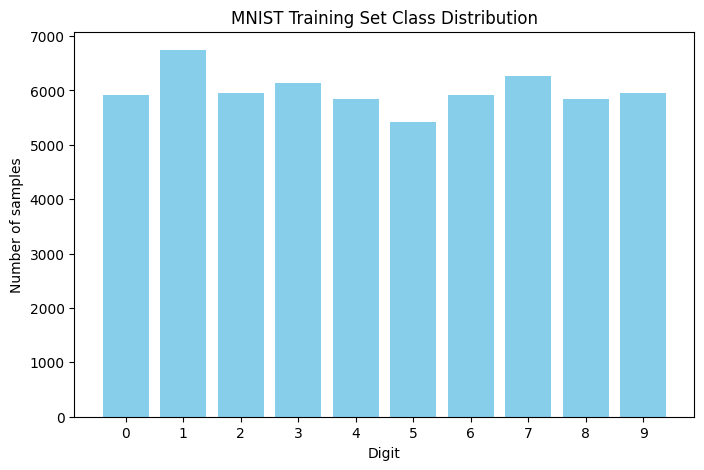

Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


In [12]:
import matplotlib.pyplot as plt
import numpy as np

train_labels = train_dataset.targets.numpy()  # convert tensor to numpy array

class_counts = np.bincount(train_labels)

plt.figure(figsize=(8,5))
plt.bar(np.arange(10), class_counts, color='skyblue')
plt.xlabel('Digit')
plt.ylabel('Number of samples')
plt.title('MNIST Training Set Class Distribution')
plt.xticks(np.arange(10))
plt.show()

for i, count in enumerate(class_counts):
    print(f"Digit {i}: {count} samples")

# ***Flattening One Image***

In [13]:
single_image = images[0]

flattened_image = single_image.view(-1)


print("Original image shape:", single_image.shape)
print("Flattened image shape:", flattened_image.shape)

Original image shape: torch.Size([1, 28, 28])
Flattened image shape: torch.Size([784])


# ***Visualizing Image Before and After Flattening***

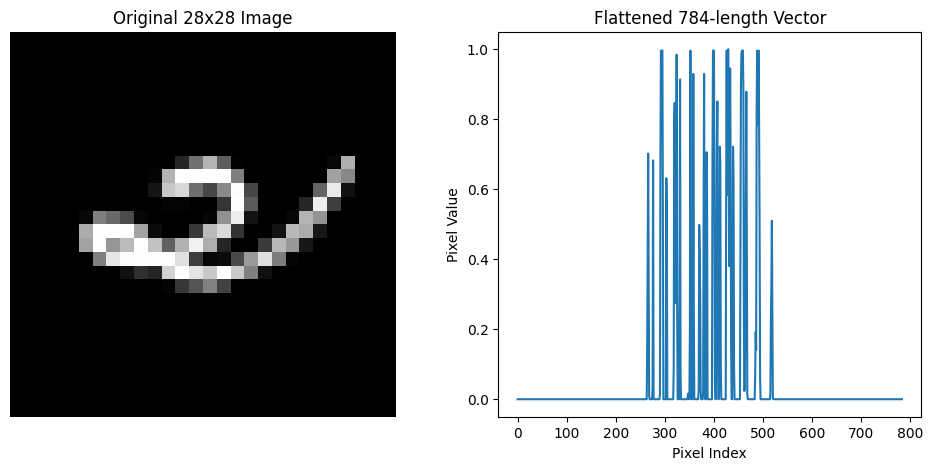

In [14]:
import matplotlib.pyplot as plt

original_image = single_image.squeeze()

flattened_image_np = flattened_image.numpy()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.title("Original 28x28 Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.plot(flattened_image_np)
plt.title("Flattened 784-length Vector")
plt.xlabel("Pixel Index")
plt.ylabel("Pixel Value")

plt.show()


#Importance of Normalization and Tensor Conversion

## 1. Tensor Conversion
Neural networks in PyTorch require inputs to be **PyTorch tensors**, not plain NumPy arrays or images.  
Tensors are the basic data structure in PyTorch and support:
- GPU acceleration
- Automatic differentiation
- Batch operations

Using `transforms.ToTensor()` converts images from PIL or NumPy format to a tensor of shape `[C, H, W]` (channel, height, width).

## 2. Normalization
Original image pixel values are typically in the range `[0, 255]`. Feeding such large values directly into a neural network can cause:
- Slower convergence
- Gradient instability
- Difficulty in learning

Normalization scales pixel values to `[0, 1]` (or standardizes to zero mean, unit variance) so that:
- The network trains faster and more stably
- Activations are balanced and less likely to saturate nonlinearities like Sigmoid or Tanh

## 3. Practical Effect
After `transforms.ToTensor()`, each image becomes a tensor with:
- dtype: `torch.float32`
- pixel values in `[0,1]`

This ensures **compatibility with PyTorch models** and improves training performance.

## Summary
Normalization and tensor conversion are essential preprocessing steps that ensure the neural network can efficiently and accurately learn from image data. Without these steps, the network might train poorly, converge slowly, or fail entirely.


# MNIST Dataset Exploration and Preprocessing Insights

## 1. Dataset Overview
- The MNIST dataset contains **70,000 grayscale images** of handwritten digits (0–9).  
  - **Training set:** 60,000 images  
  - **Test set:** 10,000 images  
- Each image has a resolution of **28x28 pixels** and a single channel (grayscale).  
- The dataset is **well-balanced**, with roughly the same number of samples per digit.

## 2. Data Loading
- Loaded using `torchvision.datasets.MNIST()` with `transforms.ToTensor()`.  
- Conversion to PyTorch tensors ensures **compatibility with neural network models**.  
- DataLoaders were created for batching and shuffling:  
  - Training DataLoader: `batch_size=64`, `shuffle=True`  
  - Test DataLoader: `batch_size=64`, `shuffle=False`

## 3. Batch Inspection
- Retrieved a batch of 64 images and labels to inspect shapes and values.  
- Image tensor shape: `[1, 28, 28]`  
- Labels tensor shape: `[64]`  
- Pixel values are normalized to `[0, 1]` after `transforms.ToTensor()`.  
- Flattened images for fully connected layers: `[784]` vector per image.

## 4. Visualization Insights
- Displaying sample images with labels helped confirm correct loading and preprocessing.  
- Flattened images show pixel values rearranged linearly from the 2D grid.  
- Class distribution plot verified that each digit has roughly **6,000 samples**, confirming dataset balance.

## 5. Preprocessing Rationale
- **Tensor Conversion:** Required for PyTorch models, enables GPU acceleration, batch operations, and automatic differentiation.  
- **Normalization:** Scales pixel values to `[0,1]` to:
  - Improve convergence speed
  - Stabilize gradients
  - Avoid saturation of activation functions like Sigmoid or Tanh  

## Summary
- The MNIST dataset is clean, balanced, and ready for neural network training after tensor conversion and normalization.  
- Visualization and batch inspection confirm correct preprocessing, ensuring compatibility and optimal performance for model training.


# Implications of MNIST Dataset Structure for Model Training and Convergence

## 1. Image Size and Resolution
- MNIST images are **small (28x28 pixels)** and grayscale.  
- **Implication:**  
  - Models require fewer parameters compared to high-resolution images.  
  - Training is faster and less computationally expensive.  
  - Convolutional networks can easily capture features like edges and strokes.

## 2. Single Channel (Grayscale)
- Images have only one channel instead of RGB.  
- **Implication:**  
  - Reduces model complexity.  
  - No need to process color information, which simplifies feature extraction.  

## 3. Dataset Size
- **Training set:** 60,000 images  
- **Test set:** 10,000 images  
- **Implication:**  
  - Sufficient for training simple neural networks and CNNs.  
  - Large enough to avoid severe overfitting, but small enough for fast experimentation.  

## 4. Balanced Classes
- Each digit (0–9) has roughly equal samples (~6,000 per class).  
- **Implication:**  
  - Ensures the model does not become biased toward any particular class.  
  - Facilitates stable convergence and higher overall accuracy.  

## 5. Normalized Pixel Values
- Pixel values are scaled to **[0,1]**.  
- **Implication:**  
  - Gradients are more stable, preventing exploding or vanishing gradients.  
  - Accelerates convergence and allows the network to learn efficiently.

## 6. Simple Patterns
- Handwritten digits have **clear structural patterns**.  
- **Implication:**  
  - Even simple networks (like MLPs or small CNNs) can achieve high accuracy.  
  - Fewer layers are required, reducing training time and resource consumption.

## Summary
- The MNIST dataset’s **small, grayscale, balanced, and normalized structure** makes it ideal for fast prototyping, testing neural network architectures, and achieving stable convergence.  
- Its simplicity allows beginners to experiment with various preprocessing techniques, model architectures, and optimization strategies without extensive computational resources.
